In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [ ]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

In [ ]:
train=df.copy()

In [ ]:
train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
train.shape

(1470, 35)

In [ ]:
train.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
train['EducationField'].unique()#OverTime,

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [ ]:
train['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [ ]:
train['Attrition'].value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

<Axes: xlabel='Attrition'>

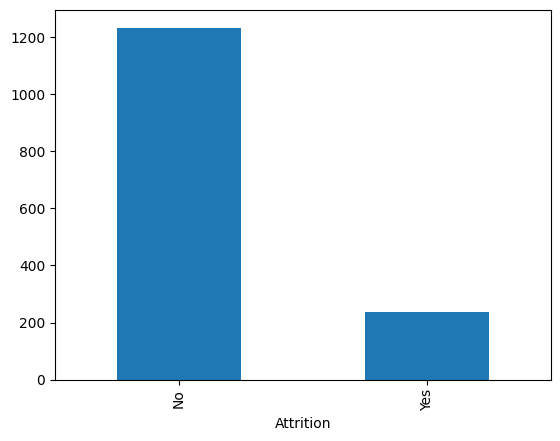

In [ ]:
train['Attrition'].value_counts().plot.bar()

<Axes: title={'center': 'Gender'}, xlabel='Gender'>

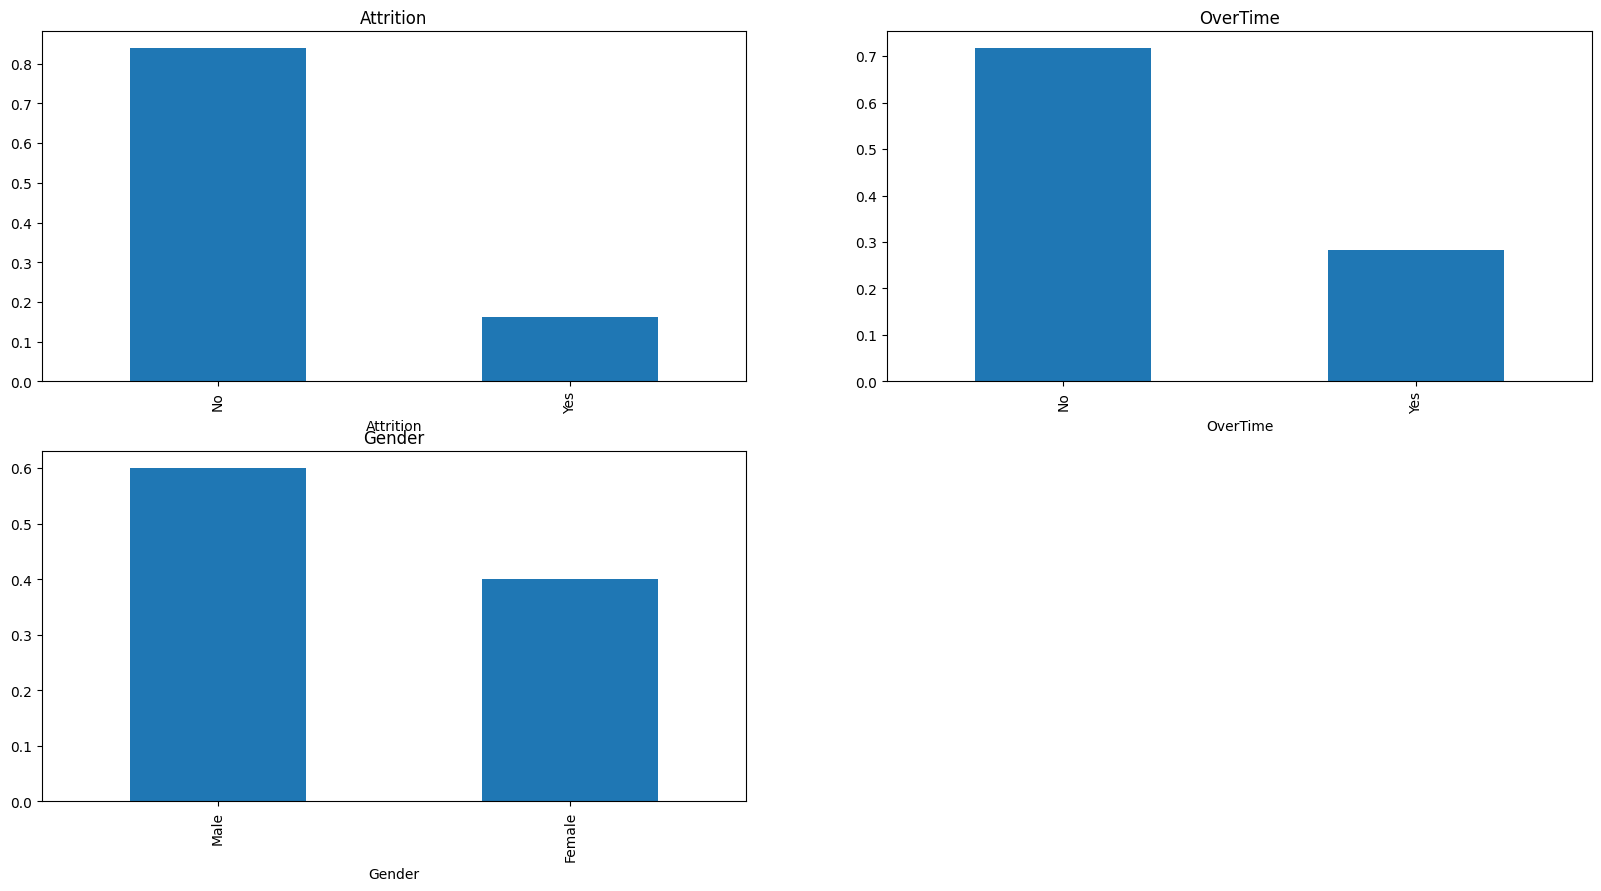

In [ ]:
# Independent Variable (Categorical)

plt.figure(1)
plt.subplot(221)
train['Attrition'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Attrition')

plt.subplot(222)
train['OverTime'].value_counts(normalize=True).plot.bar(title= 'OverTime')

plt.subplot(223)
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

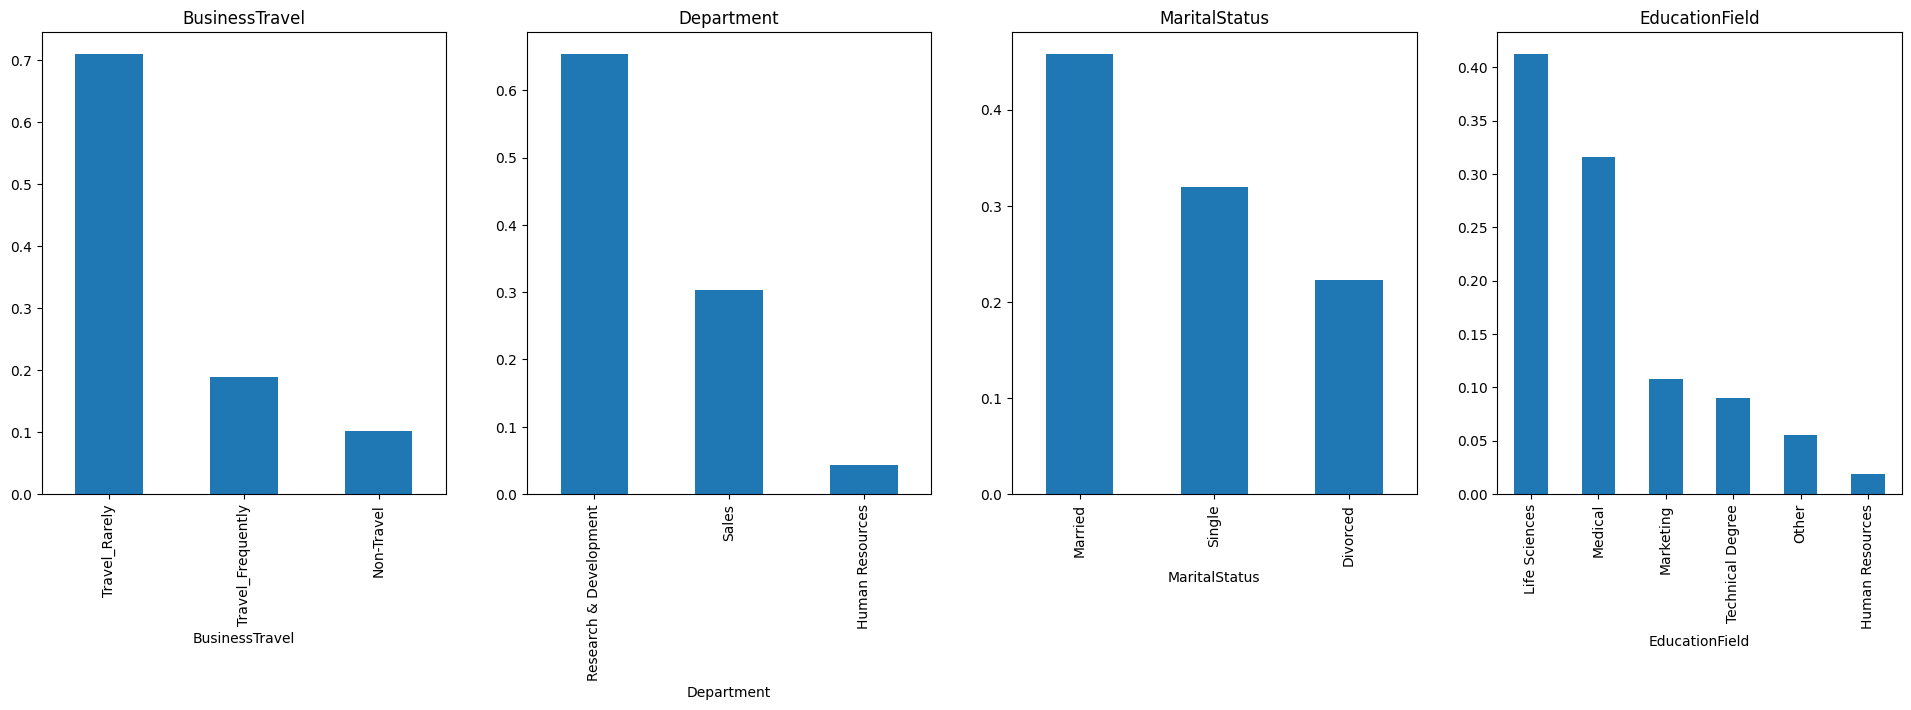

In [ ]:
# Independent Variable (Ordinal)
plt.figure(1)
plt.subplot(141)
train['BusinessTravel'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'BusinessTravel')

plt.subplot(142)
train['Department'].value_counts(normalize=True).plot.bar(title= 'Department')

plt.subplot(143)
train['MaritalStatus'].value_counts(normalize=True).plot.bar(title= 'MaritalStatus')

plt.subplot(144)
train['EducationField'].value_counts(normalize=True).plot.bar(title= 'EducationField')
plt.show()


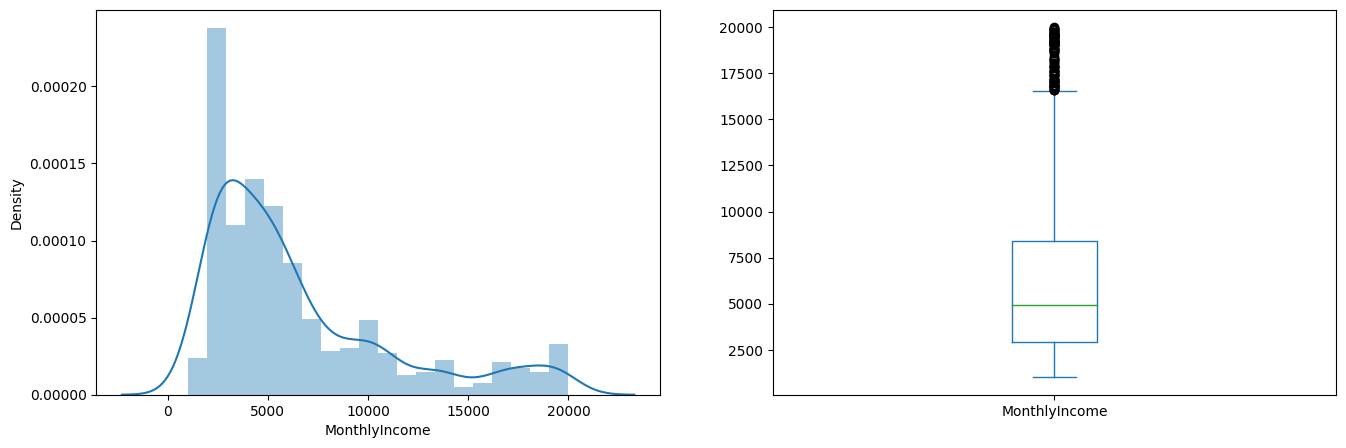

In [ ]:
# Independent Variable (Numerical)

plt.figure(1)
plt.subplot(121)
sns.distplot(train['MonthlyIncome']);
plt.subplot(122)
train['MonthlyIncome'].plot.box(figsize=(16,5))
plt.show()

<Axes: xlabel='Gender'>

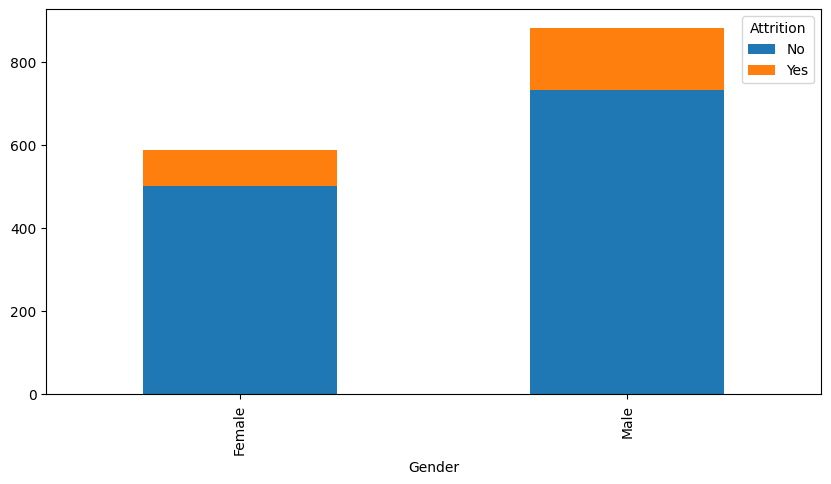

In [ ]:
# for i in train.columns:
#   print(i)
Gender=pd.crosstab(train['Gender'],train['Attrition'])
Gender.plot(kind='bar',stacked=True,figsize=(10,5))

<Axes: xlabel='MaritalStatus'>

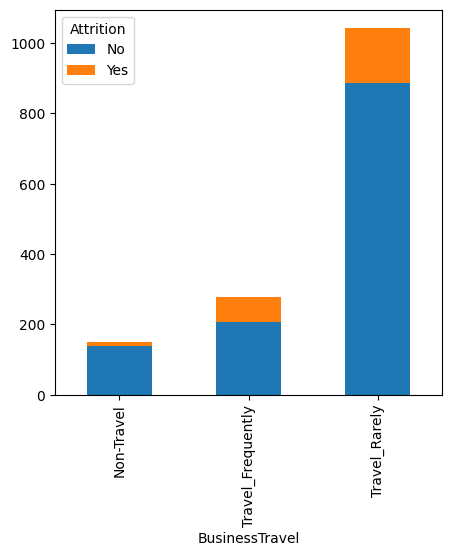

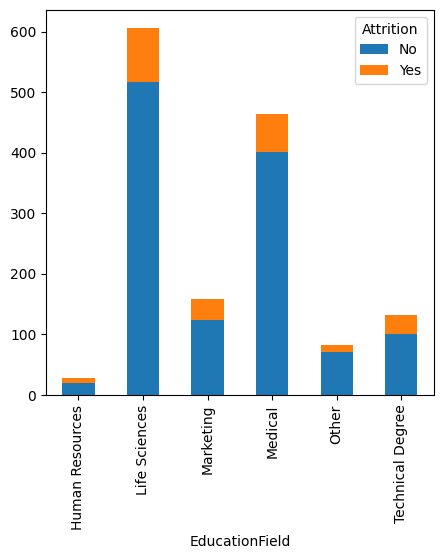

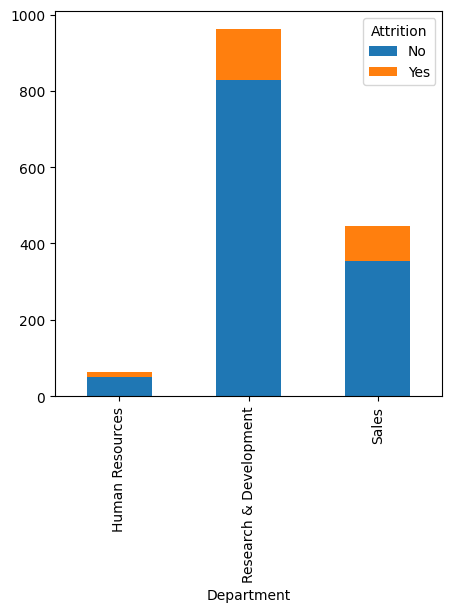

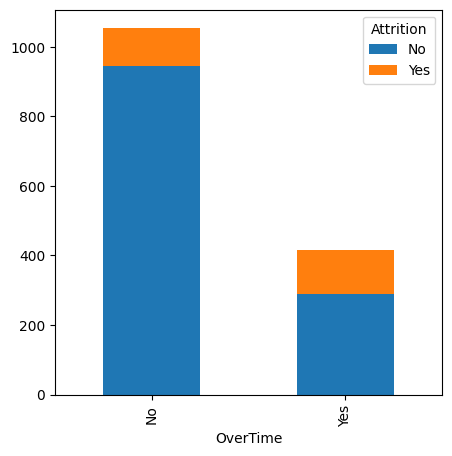

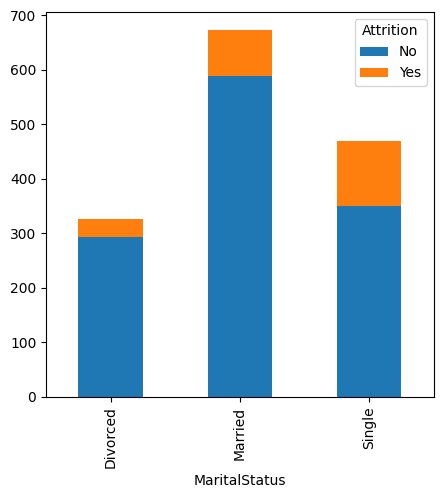

In [ ]:
BusinessTravel=pd.crosstab(train['BusinessTravel'],train['Attrition'])
BusinessTravel.plot(kind='bar',stacked=True,figsize=(5,5))
EducationField=pd.crosstab(train['EducationField'],train['Attrition'])
EducationField.plot(kind='bar',stacked=True,figsize=(5,5))
Department=pd.crosstab(train['Department'],train['Attrition'])
Department.plot(kind='bar',stacked=True,figsize=(5,5))
OverTime=pd.crosstab(train['OverTime'],train['Attrition'])
OverTime.plot(kind='bar',stacked=True,figsize=(5,5))
MaritalStatus=pd.crosstab(train['MaritalStatus'],train['Attrition'])
MaritalStatus.plot(kind='bar',stacked=True,figsize=(5,5))


<Axes: xlabel='Attrition'>

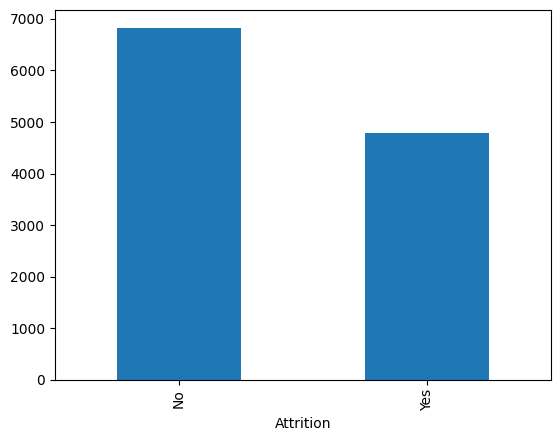

In [ ]:
train.groupby('Attrition')['MonthlyIncome'].mean().plot.bar()

<Axes: xlabel='income_bin'>

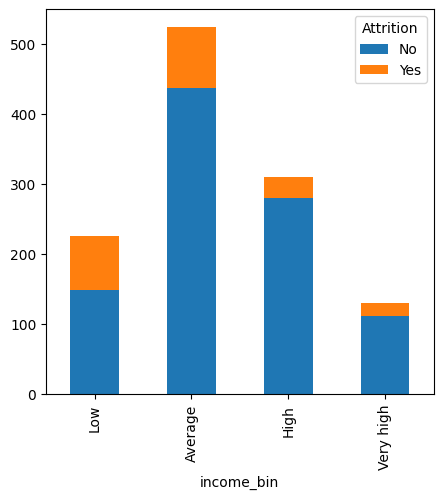

In [ ]:
bins=[0,2500,5000,7500,10000]
group=['Low','Average','High', 'Very high']
train['income_bin']=pd.cut(train['MonthlyIncome'],bins,labels=group)
income_bin=pd.crosstab(train['income_bin'],train['Attrition'])
income_bin.plot(kind='bar',stacked=True,figsize=(5,5))

In [ ]:
train.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [ ]:
train['income_bin'].fillna(train['income_bin'].mode()[0], inplace=True)


In [ ]:
train.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
train['Attrition'] = np.where(train['Attrition']=='Yes', 1, 0)

In [ ]:
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,income_bin
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,High
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,High
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Low
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Average
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Average


In [ ]:
X = train.drop('Attrition',axis=1)
y = train.Attrition

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(X_test)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8163265306122449

In [ ]:
pred_test = model.predict(test)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1

pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8367346938775511

2 of kfold 5
accuracy_score 0.8367346938775511

3 of kfold 5
accuracy_score 0.8469387755102041

4 of kfold 5
accuracy_score 0.8401360544217688

5 of kfold 5
accuracy_score 0.8401360544217688


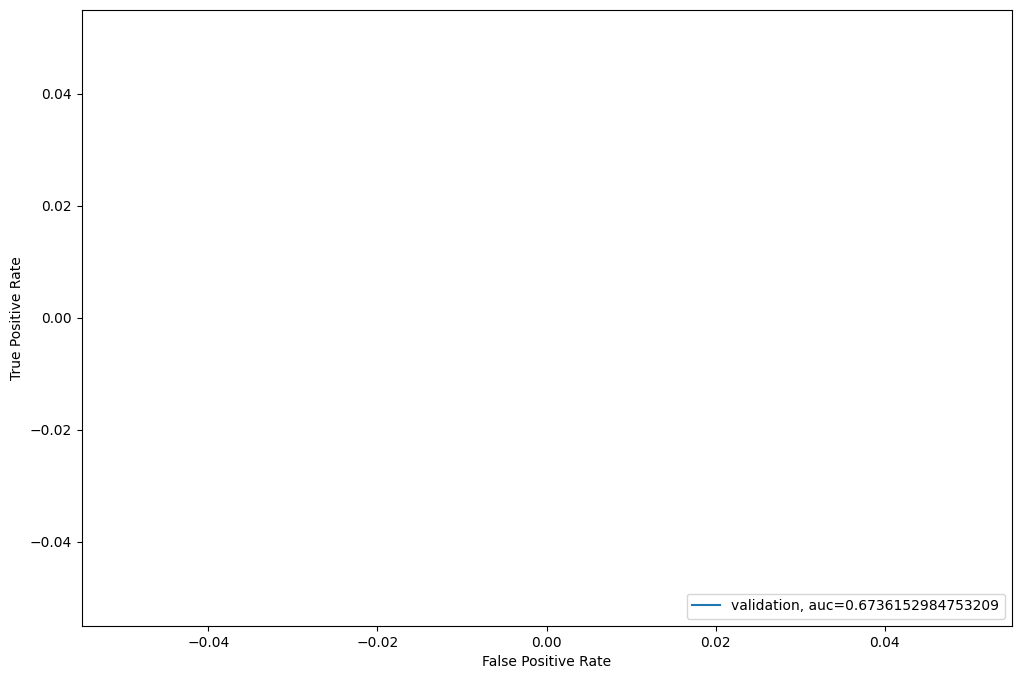

In [ ]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl,  pred,pos_label = 'Yes')
auc = metrics.roc_auc_score(yvl, pred)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

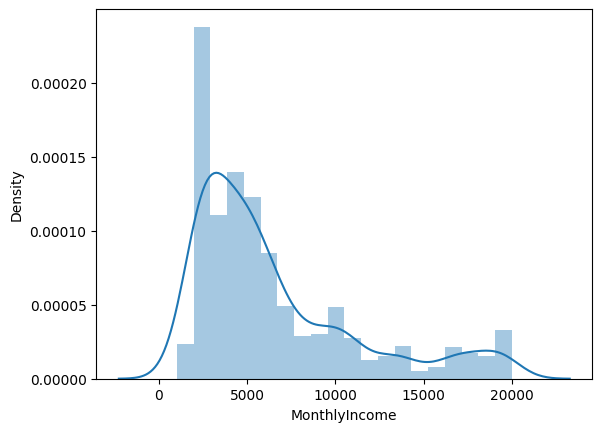

In [ ]:
sns.distplot(train['MonthlyIncome']);

In [ ]:
train.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1

pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8367346938775511

2 of kfold 5
accuracy_score 0.8367346938775511

3 of kfold 5
accuracy_score 0.8469387755102041

4 of kfold 5
accuracy_score 0.8401360544217688

5 of kfold 5
accuracy_score 0.8401360544217688


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1

pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8435374149659864

2 of kfold 5
accuracy_score 0.8435374149659864

3 of kfold 5
accuracy_score 0.8673469387755102

4 of kfold 5
accuracy_score 0.8503401360544217

5 of kfold 5
accuracy_score 0.8605442176870748


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}


In [ ]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [ ]:
grid_search.best_estimator_


RandomForestClassifier(max_depth=11, n_estimators=41, random_state=1)

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(test)
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8401360544217688

2 of kfold 5
accuracy_score 0.8401360544217688

3 of kfold 5
accuracy_score 0.8435374149659864

4 of kfold 5
accuracy_score 0.8503401360544217

5 of kfold 5
accuracy_score 0.8435374149659864


In [ ]:
from xgboost import XGBClassifier

In [ ]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = XGBClassifier(n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1

pred_test = model.predict(test)
pred3=model.predict_proba(test)[:,1]


6 of kfold 5
accuracy_score 0.8571428571428571

7 of kfold 5
accuracy_score 0.8707482993197279

8 of kfold 5
accuracy_score 0.8673469387755102

9 of kfold 5
accuracy_score 0.8673469387755102

10 of kfold 5
accuracy_score 0.8639455782312925
